<a href="https://colab.research.google.com/github/leoUninova/Transistor-altair-plots/blob/master/Work_2_cloning_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Clone the entire repo from my github
# Clone the entire repo.
!git clone -l -s git://github.com/leoUninova/Transistor-altair-plots.git cloned-repo
%cd cloned-repo
!ls


#to delet: 

# os.chdir('/content') #set the base folder up 
# print (os.getcwd())
# import shutil
# !rm -rf /content/cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 417 (delta 162), reused 300 (delta 159), pack-reused 109
Receiving objects: 100% (417/417), 7.86 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (232/232), done.
/content/cloned-repo
df1.csv  df.csv  INIT.csv  Raw_data  Work1.ipynb


In [0]:
#@title imported packages
import numpy as np
import os 
import pandas as pd
import glob

In [0]:
#@title directory setup
"directoreis setup" 
class DirectorySetup: 
    '''The directory paths for the program'''
    def __init__(self):
        
        #self.cwd = os.getcwd()
        self.cwd='/content'
        self.Raw_data_dir= '/content/cloned-repo/Raw_data'
        self.table_dir= '/content/cloned-repo'



In [0]:
#@title making one file cleand
class OneFile :
  '''features finds the INIT collumn values, 
  clean it cleans the data and gets the data columnn.names
  '''
    
  def __init__(self, files, INIT):
    self.files=files
    self.INIT = INIT 
    lst=[]
       
    for ind, file in enumerate (files):
      lst.append(self.clean_it(file))
      self.lst=lst
        
        
  def features (self, df1, file):
      
    "divides the filename up"
    for idx, col in enumerate(self.INIT.columns):
      "setting start to the symbol to find from INIT, moving over the col"
      start=self.INIT[col].iloc[0]
      if start=='_value_':
        df1[col]=self.INIT[col].iloc[1]
        continue
        
      if start=='_0000_': #start at 0 
        start=0
      
      else: #dont start at 0 
        start=file.find(start)+1 #find the start position, add 1 for where the feature starts
        
              
      stop=self.INIT[col].iloc[1] #find the symobol for stop from INIT
      stop=file[1:].find(stop)+1 # find the stop position, skipping over the first elemnt in case it is the same as start. adding 1 to get the value where the feature starts.
                      
              
      df1[col]=file[start:stop] #append a collumn with the feature name, and the name using start stop
      
      file=file[stop:]  #make the file smaller at position stop to and repeat the whole loop. 
      
       
    return df1
      
  def clean_it(self, file):
    "IMPORT THE FILE"
    os.chdir(Directory.Raw_data_dir)
    "Large ranom list of values for the collumn names (for import)"
    my_cols=['A','B','C','D','E', 'G', 'H', 'I', 'j', 'K', 'L','M', 'N', 'O','P', 'Q', 'R', 'S']
    df=pd.read_csv(file ,sep=', ',header=None, names=my_cols)
    df.dropna(axis='columns', inplace=True, how='all')
      
    "CLEAN THE FILE"  
    df=df.loc[(df.iloc[:,0] == 'DataName') | (df.iloc[:,0] == 'DataValue')] #take away all that dont have datavalue or dataname
    df.reset_index(drop=True, inplace=True) 
    file_list=[] #list wher the dataframes are stored
    col=df[df.iloc[:,0] == 'DataName'] #the 'append' repetirions withing one file
    for i in range(len(col)-1): #iterate over the repetitions and append
      temp=df[col.index[i]:col.index[i+1]] #the first dataframe
      temp.columns = temp.iloc[0] #give collumn names
      temp=temp.loc[temp.iloc[:,0] == 'DataValue'] #take away everything that isn't a value
      temp=temp.drop('DataName', axis='columns') #repetirion of the line above.
      temp['file']=str(file + str(i) ) #add filename to dataframe
      temp=self.features(df1=temp, file=file) #add the features to the dataframe
      file_list.append(temp)  #append to the file_list 
        
    "repeating for last frame" 
    temp=df[col.index[-1]:]
    temp.columns = temp.iloc[0]
    temp=temp.loc[temp.iloc[:,0] == 'DataValue']
    temp=temp.drop('DataName', axis='columns')
    temp['file']=str(file + str(len(col)-1) )
    temp=self.features(df1=temp, file=file)
    file_list.append(temp)
    "make the file_list into one dataframe"                 
    df=pd.concat(file_list, axis=0, ignore_index=True)
    return df     
    

      
      

In [5]:
#@title making one file clean main()
"directory object"
Directory=DirectorySetup()
    
" Import the table " 
os.chdir(Directory.table_dir)
#Table_1=pd.read_csv('Table_1.csv' )

INIT=pd.read_csv('INIT.csv')



"Clean the data " 
os.chdir(Directory.Raw_data_dir)        
first=OneFile(glob.glob('*.csv'), INIT=INIT)  

"create a single file"
one=pd.concat(first.lst, axis=0, ignore_index=True, sort=True)
one.Thickness.replace('br', 250, inplace=True)
one.Temperature.replace('br', 180, inplace=True)
one=one.apply(pd.to_numeric, downcast='signed', errors='ignore')
one['logabsID']=np.log10(one.absID)
one['Name'] = one["Number"].map(str) +'-'+one["Temperature"].map(str) +'-' +one["Thickness"].map(str)+'-' +one["W"].map(str) +'-'+one["L"].map(str) 

""


"change directory and export whole csv "
os.chdir(Directory.table_dir)
one.to_csv('one.csv', sep=',')

#pd.set_option('display.max_row', None)  
#one

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


In [0]:
#@title Subsetting funciton
class Subsetting:   
    'do i want to pass a file every time i call subsetting or get the method and then use it as i please'

    
    def __init__(self):
        pass 
                    
                    
    def SubsetVariable ( self, data, *arg, **kwargs):  # https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
        #print (data.loc[data.absIG==0])
        ''' 
        can pass **name_dict and it works.
        CHECK YOUR DATA DOESN'T HAVE .0 IF IT DOES YOU HAVE TO CALL IT WITH THAT !! 
        
        takes n argumments, joins them in a query, TRANFROMS DATASET TO STR , and gives back susett '''
        
        self.data=data
        
        qry = ' & '.join(["{} == '{}'".format(key,value) for key,value in kwargs.items()])        
        df=self.data.astype(str)
        subset=df.query(qry)
        self.subset=subset
   
    def SubsetUnique(self, data):
        data = data.drop_duplicates(subset='Names', keep='first')


In [0]:
#@title Plot functions (sat, lin, stab)

def stab_plot(data, leakage=False, title=False, show=True):
  'subset of the data '

  sub=Subsetting()
  temp=sub.SubsetVariable(data, Curve='Transfer stab')
  data=sub.subset.apply(pd.to_numeric, errors='ignore')
  #print (data.absIG.loc[data.absIG==0])
  'The plot'
  #data.reset_index()
  if data.empty:
    print ('passed empty dataframe for stab')
    return ('end') 
  
  fig, ax = plt.subplots(figsize=(12, 8))
  if title: 
    fig.suptitle('stab ' + title, fontsize=16)
  
  else: 
    fig.suptitle(f'stab {data.Temperature.iloc[0]}', fontsize=16)
  fig.suptitle(f'stab {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')



  for key, grp in data.groupby(['Name']): 
    y=grp.logabsID
    x=grp.VG
    y2=np.log10(grp.absIG)
    
    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(x,  y,  label=key, color=color)

    
    if leakage: 
      ax.plot(x, y2, color=color , label='', linestyle='--' )
    #print(grp.loc[grp.absIG==0])


  plt.legend(loc='best')
  if show: 
    plt.show()




def lin_plot (data, leakage, title=False, show=True):
  'subset of the data '
  
  sub=Subsetting()
  temp=sub.SubsetVariable(data, Curve='Transfer lin')
  data=sub.subset.apply(pd.to_numeric, errors='ignore')
  #print (data.absIG.loc[data.absIG==0])
  'The plot'
  #data.reset_index()
  if data.empty:
    print ('passed empty dataframe for lin')
    return ('end') 
  
  fig, ax = plt.subplots(figsize=(12, 8))
  if title: 
    fig.suptitle('lin ' + title, fontsize=16)
  
  else: 
    fig.suptitle(f'lin {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')
  
  

  for key, grp in data.groupby(['Name']): 
    y=grp.logabsID
    x=grp.VG
    y2=np.log10(grp.absIG)
    
    color = next(ax._get_lines.prop_cycler)['color']
   
    ax.plot(x,  y,  label=key, color=color)
    
    if leakage: 
      ax.plot(x, y2, color=color , label='', linestyle='--' )
    #print(grp.loc[grp.absIG==0])
    
      
  plt.legend(loc='best')
  
  plt.show()

def sat_plot (data, leakage, title=False, show=True):
  'subset of the data '
  
  sub=Subsetting()
  temp=sub.SubsetVariable(data, Curve='Transfer sat')
  data=sub.subset.apply(pd.to_numeric, errors='ignore')
  #print (data.absIG.loc[data.absIG==0])
  'The plot'
  #data.reset_index()
  if data.empty:
    print ('passed empty dataframe for lin')
    return ('end') 
  
  fig, ax = plt.subplots(figsize=(12, 8))
  if title: 
    fig.suptitle('sat ' + title, fontsize=16)
  
  else: 
    fig.suptitle(f'sat {data.Temperature.iloc[0]}', fontsize=16)
  ax.set_ylabel('abs(logID)')
  ax.set_xlabel('VG')
  
  

  for key, grp in data.groupby(['Name']): 
    y=grp.logabsID
    x=grp.VG
    y2=np.log10(grp.absIG)
    
    color = next(ax._get_lines.prop_cycler)['color']
   
    ax.plot(x,  y,  label=key, color=color)
    
    if leakage: 
      ax.plot(x, y2, color=color , label='', linestyle='--' )
    #print(grp.loc[grp.absIG==0])
    
      
  plt.legend(loc='best')
  
  plt.show()  
  




In [0]:
#@title Plot function main ()
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as mtick
import numpy as np


os.chdir(Directory.table_dir)
df=pd.read_csv('one.csv' )


#print (df.loc[df.absIG==0])

#df.absIG.replace(0, 1e-14, inplace=True)

#print (df.loc[df.absIG==0])
#eample
# sub=Subsetting()
# df1=sub.SubsetVariable(df, Temperature='300', Thickness='250' )
# df1=sub.subset
# df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
# lin_plot(df1, leakage=False)





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

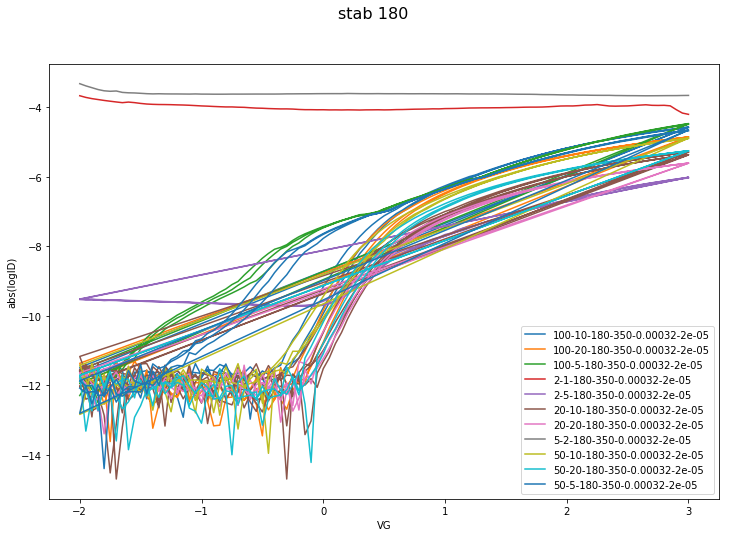

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log10


<Figure size 216x216 with 0 Axes>

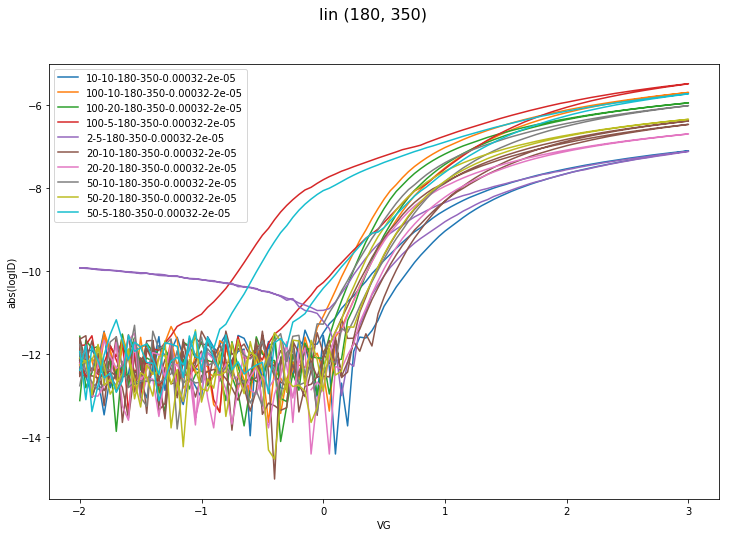

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

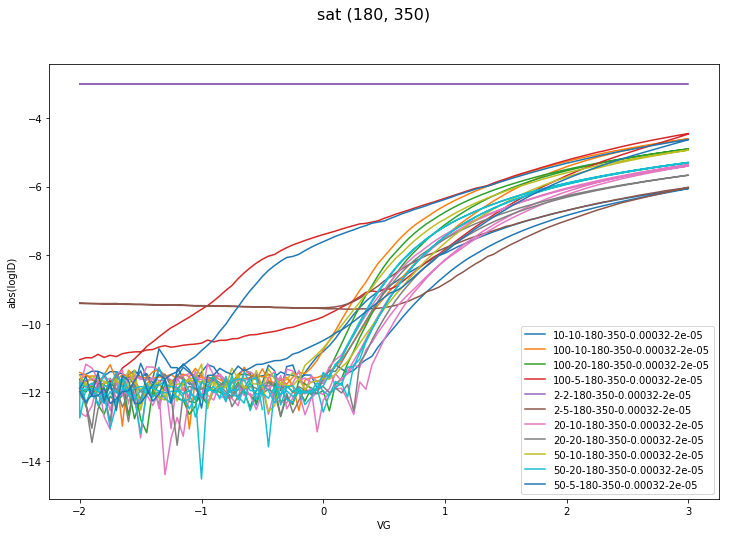

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


<Figure size 216x216 with 0 Axes>

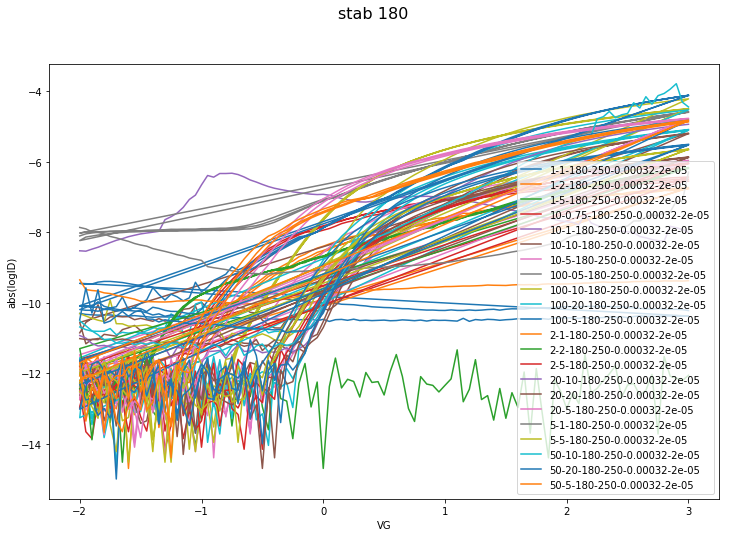

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

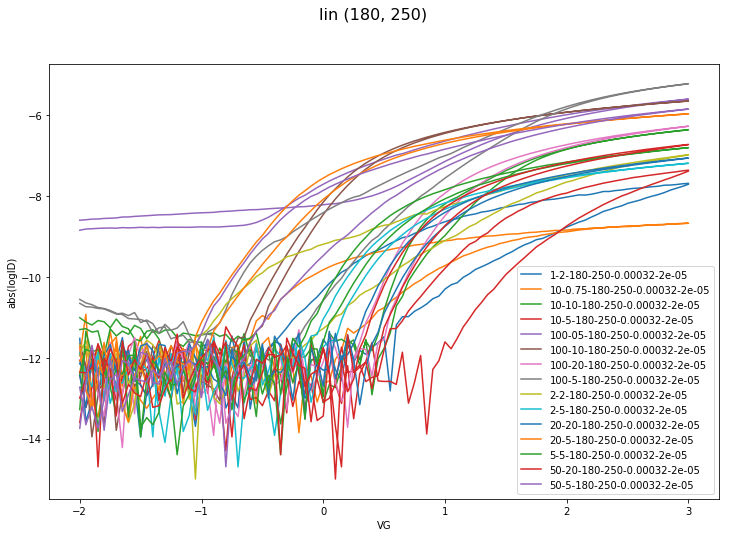

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

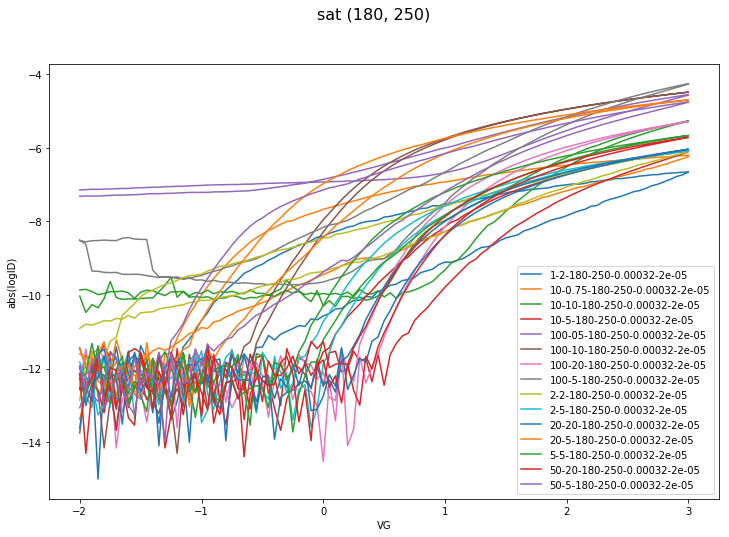

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

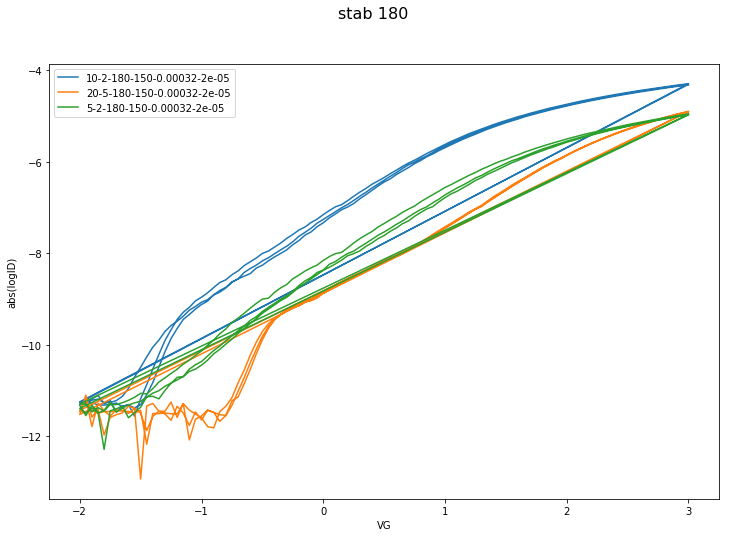

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

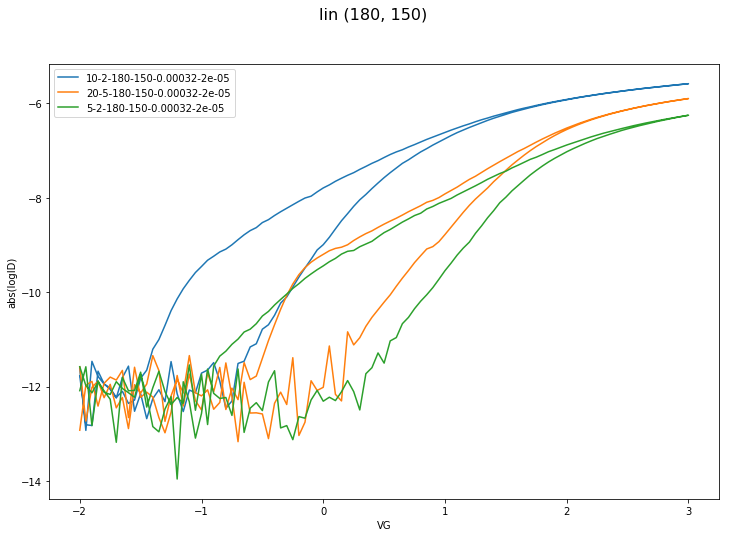

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

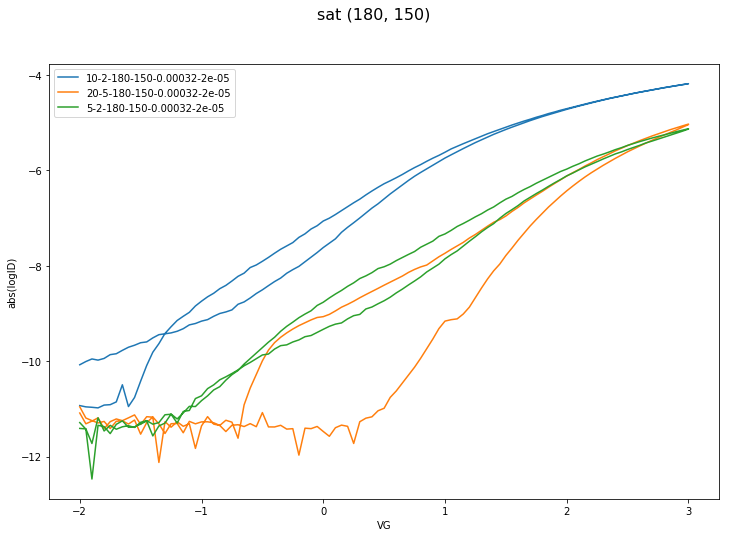

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

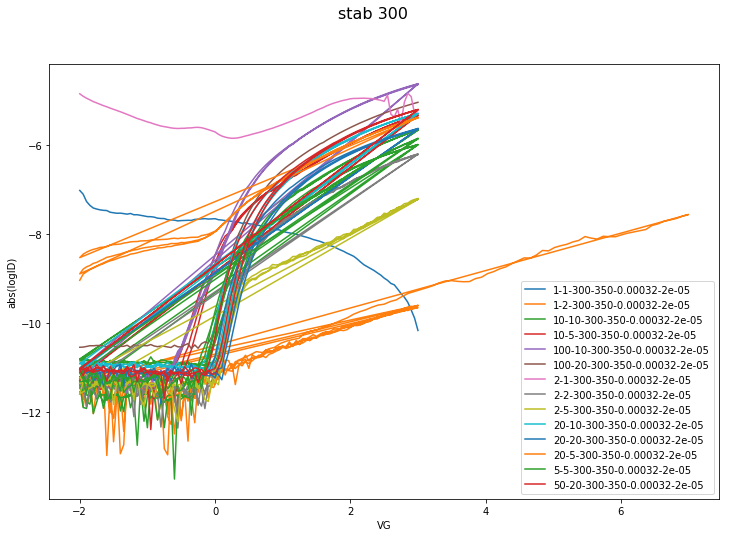

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

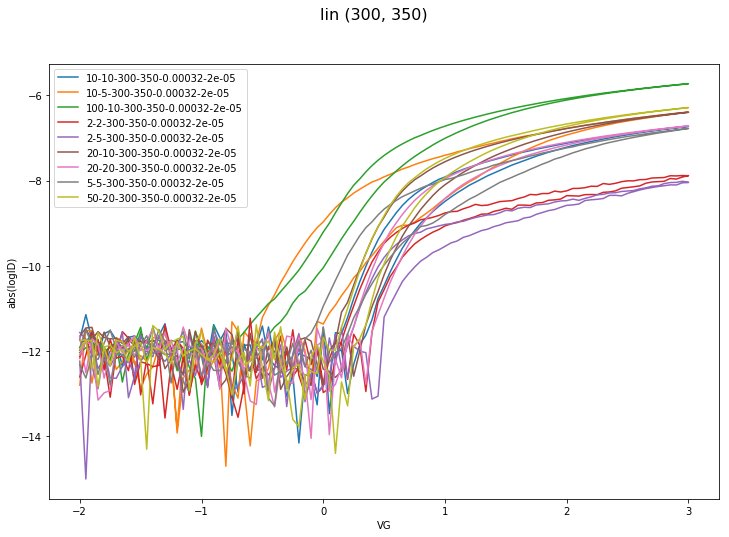

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

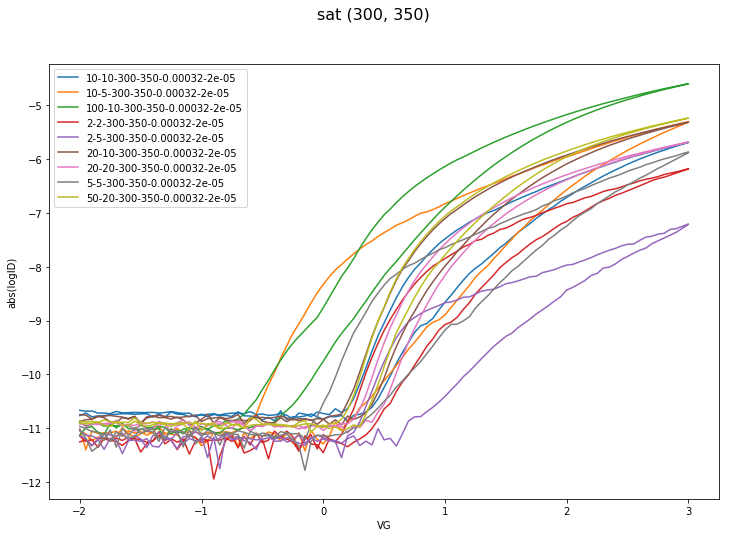

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

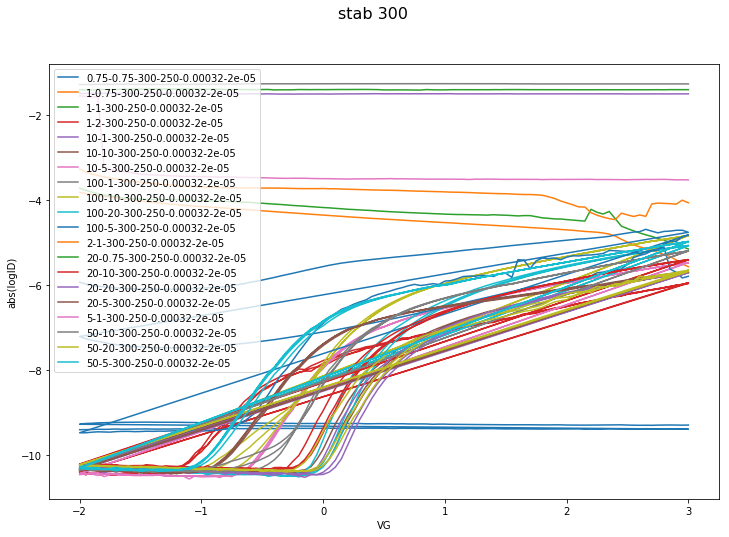

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

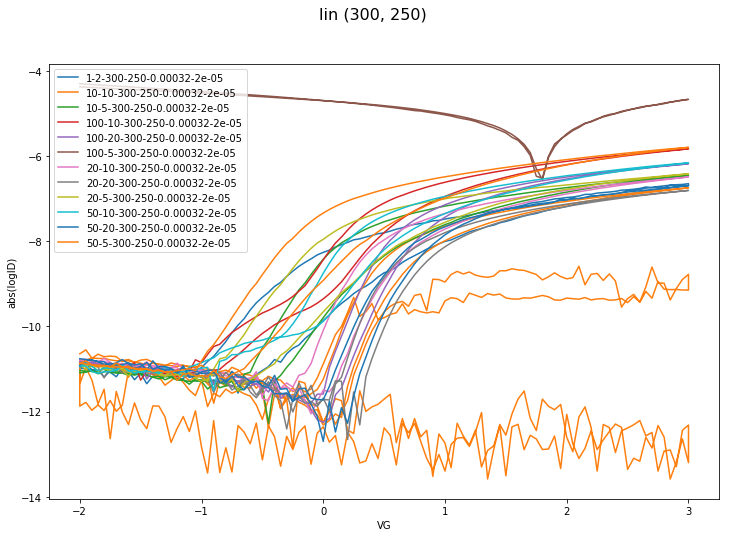

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

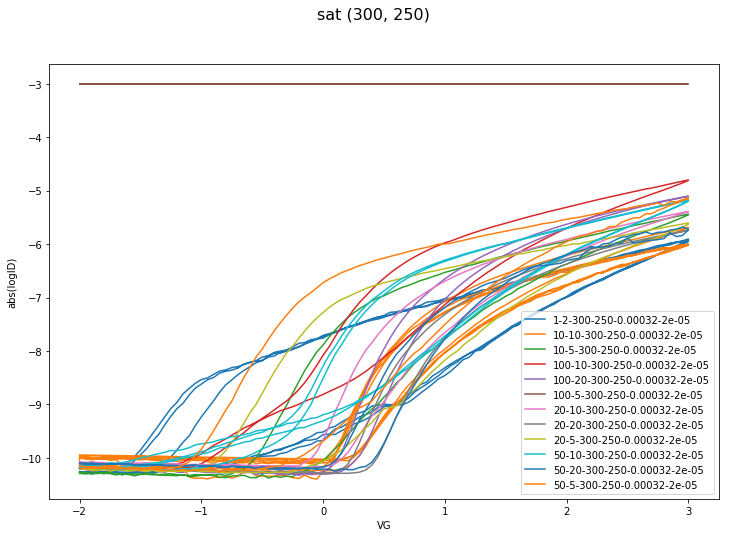

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

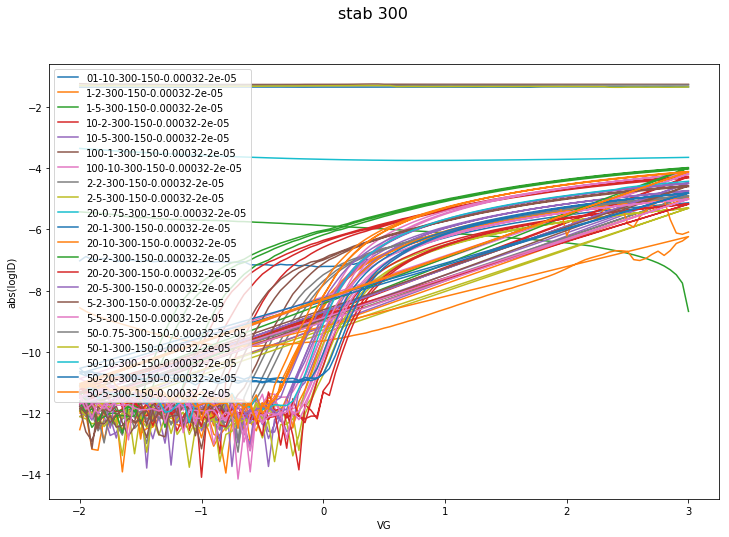

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

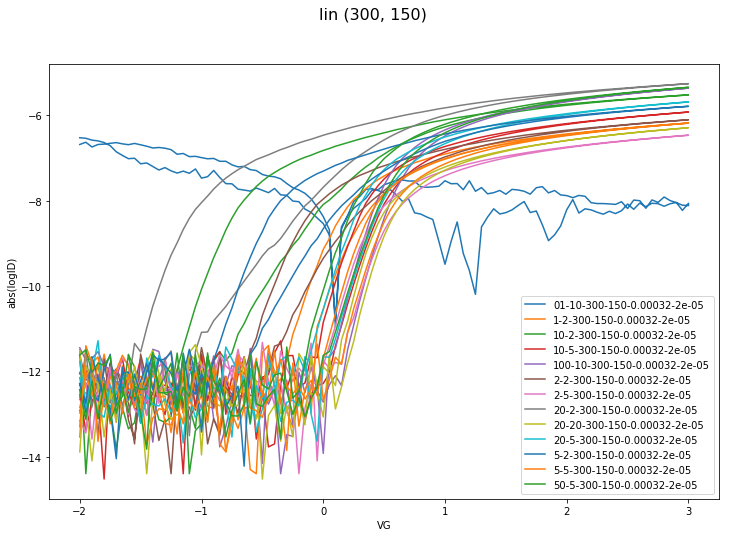

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

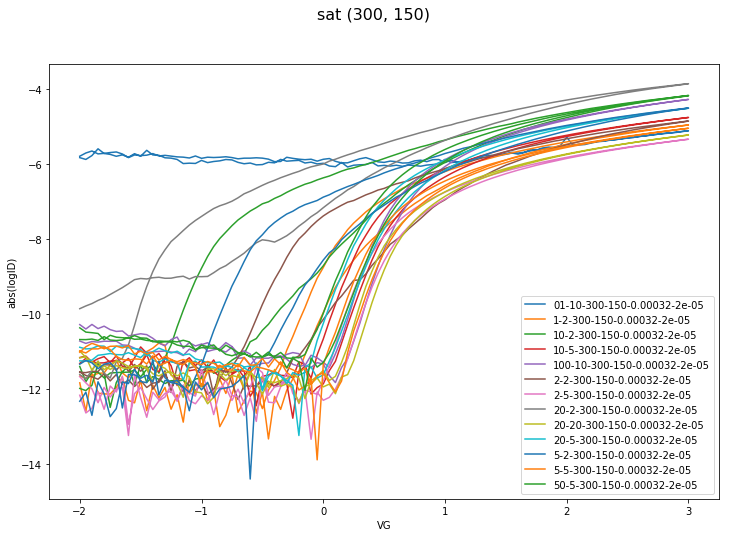

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#@title Double widget graphs, Raw fields: 


Graph_division = "Temperature Thickness" #@param {type:"string"}
user= list(Graph_division.split())

leakage = False #@param {type:"boolean"}



from __future__ import print_function
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip


'dictionary contaning the keys we want to subset by '
params = {}  #https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
sub=Subsetting()

"adding the unique values of the collumns to the dictionary "
for col in user: 
  params[col]=df[col].unique()
  

  

keys=list(params)

c= ((list(itertools.product(*map(params.get, keys))))) #https://stackoverflow.com/questions/32074543/how-to-get-the-length-of-an-itertools-product

title=[]
for i in range (len(c)):
  title.append(str(c[i]))
  
  
#the beginning of hte funciton  
    
def create_tab(location):
  tb = widgets.TabBar(['stab','lin', 'sat'], location=location)
  with tb.output_to('stab',  select=(i < 1)):
    pylab.figure(figsize=(3, 3))
    stab_plot(df1, leakage=leakage, title=str(values))
  with tb.output_to('lin',  select=(i < 1)):
    pylab.figure(figsize=(3, 3))
    lin_plot(df1, leakage=leakage, title=str(values))
  # Note you can access tab by its name (if they are unique), or
  # by its index.
  with tb.output_to(2, select=(i < 1)):
    pylab.figure(figsize=(3, 3))
    sat_plot(df1, leakage=leakage, title=str(values))  
  


# #tb = widgets.TabBar([str(i) for i in range(len(list(itertools.product(*map(params.get, keys)))))])    
tb = widgets.TabBar(title)
for i, values in enumerate (itertools.product(*map(params.get, keys))):
  df1=sub.SubsetVariable(df, **dict(zip(keys, values)))
  df1=sub.subset
  df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
  df1.reset_index()
  
  with tb.output_to(i, select=(i < 1)):
    create_tab('start')



In [0]:
#@title Raw fields

Graph_division = "Temperature Thickness" #@param {type:"string"}
user= list(Graph_division.split())

leakage = True #@param {type:"boolean"}


In [0]:
#@title The graphs: 

# 'dictionary contaning the keys we want to subset by '
# params = {}  #https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
# sub=Subsetting()

# "adding the unique values of the collumns to the dictionary "
# for col in user: 
#   params[col]=df[col].unique()
#   print (df[col].unique())
  




# "iterating over all pairs possible for the dictionary, passing them to subset"
# import itertools
# keys = list(params)
# for values in itertools.product(*map(params.get, keys)):
#     df1=sub.SubsetVariable(df, **dict(zip(keys, values)))
#     df1=sub.subset
#     df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
#     df1.reset_index()
#     if df1.empty:
#       print(f'for {values} DataFrame is empty!')
#       continue 
#     lin_plot(df1, leakage=leakage, title=str(values))
#     #sat_plot(df1)
#     #print (df1.Temperature.iloc[0])
#     stab_plot(df1)
    
    

In [0]:
#@title widget graphs 
#importts

# from __future__ import print_function

# from google.colab import widgets
# from google.colab import output
# from matplotlib import pylab
# from six.moves import zip



# params = {}  #https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
# sub=Subsetting()

# "adding the unique values of the collumns to the dictionary "
# for col in user: 
#   params[col]=df[col].unique()
  
  

# keys=list(params)

# c= ((list(itertools.product(*map(params.get, keys))))) #https://stackoverflow.com/questions/32074543/how-to-get-the-length-of-an-itertools-product

# title=[]
# for i in range (len(c)):
#   title.append(str(c[i]))

# # #tb = widgets.TabBar([str(i) for i in range(len(list(itertools.product(*map(params.get, keys)))))])    
# tb = widgets.TabBar(title)
# for i, values in enumerate (itertools.product(*map(params.get, keys))):
#   df1=sub.SubsetVariable(df, **dict(zip(keys, values)))
#   df1=sub.subset
#   df1=df1.apply(pd.to_numeric, downcast='signed', errors='ignore')
#   df1.reset_index()
  
#   with tb.output_to(i, select=(i < 1)):
#     lin_plot(df1, leakage=leakage, title=str(values))
    
  